<a href="https://colab.research.google.com/github/prishanmu/She-Ra/blob/master/She_Ra_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Look at the Princesses of Power

GitHub Repo: https://github.com/prishanmu/She-Ra

**Research Questions**: 


*   Who are the main or most active characters of this show? Does this change by season? 
*   What are the most common words used by characters in this show?
* What are the most "important" words spoken by certain characters on this show? 
* Data Modeling: Can we predict which lines were spoken by Adora? or Catra? 
* What are some relationships among words on this show? 
* Sentiment Analysis by Character (and eventually season)





# Import Statements & Data

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from collections import Counter
import nltk
import string
import itertools
import collections
from os import path
from PIL import Image

In [11]:
df = pd.read_csv("she_ra_dialogue.csv")
df = df[df.dialogue!=' ']
df.dialogue.astype('str')
df.head()

,character,dialogue,season,episode
0,Adora,". Hey, princess. You looking at me?",1,1
1,Woman over PA,"All squadrons, report to training area immedi...",1,1
2,Adora,Psst. Anyone seen Catra?,1,1
4,Adora,Not again.,1,1
5,Unknown Blue Horde Member,"At attention, cadets. Your simulation is abou...",1,1


In [12]:
# to-do: clean up df's character column - catch any spelling mistakes

# Who are the main or most active characters of this show? Does this change by season?

Let's look at the characters with the highest number of lines: 

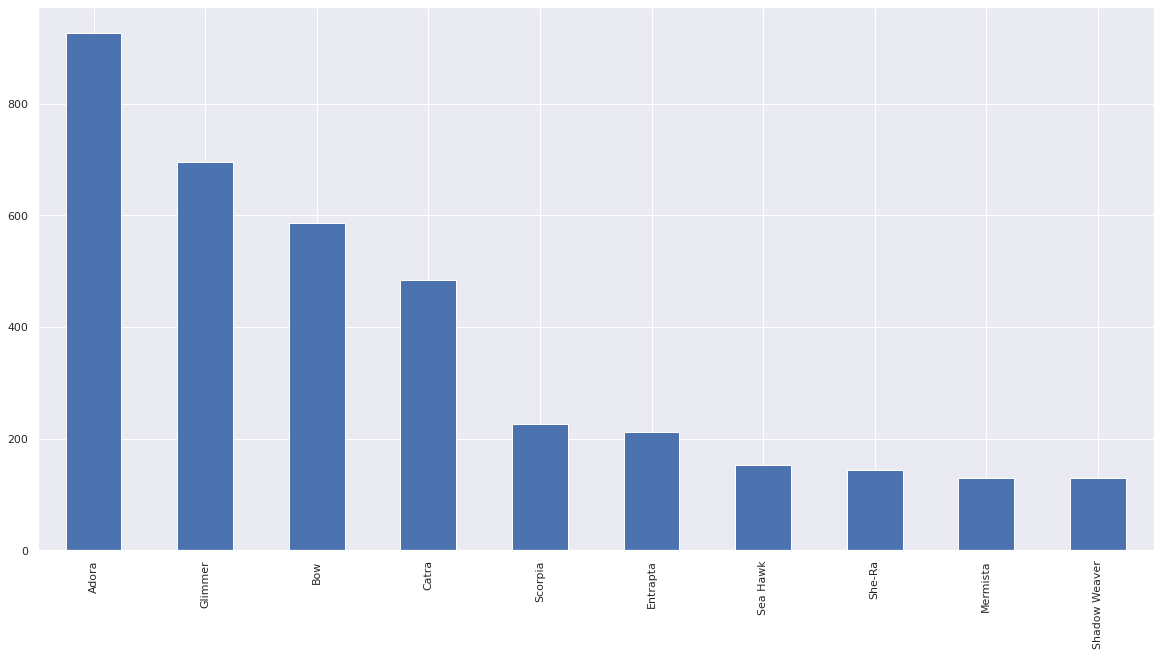

In [13]:
sns.set(style="darkgrid")

s = df.character.value_counts()[:10]

plt.figure(figsize=(20,10))
s.plot(kind="bar")
plt.show()


Since most of the episodes are transcribed for season 1, how about the main characters of just season 1? 

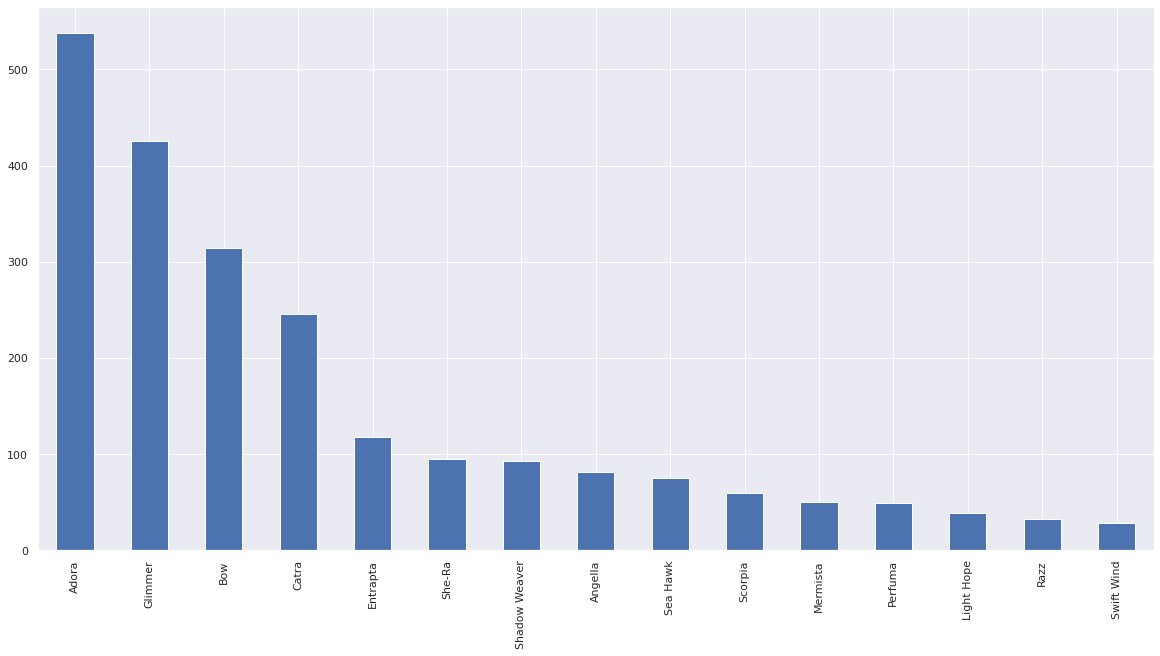

In [100]:
sns.set(style="darkgrid")

s1 = df[df.season ==1].character.value_counts()[:15] #top 15

plt.figure(figsize=(20,10))
s1.plot(kind="bar")
plt.show()

Unsurprisingly, Adora, aka She-Ra, has the most lines in the show and is the main character. Glimmer, Bow, and Catra, some of the people closest to Adora, are also top contenders for most lines in the show. 

Let's see how this might differ depending on season. 

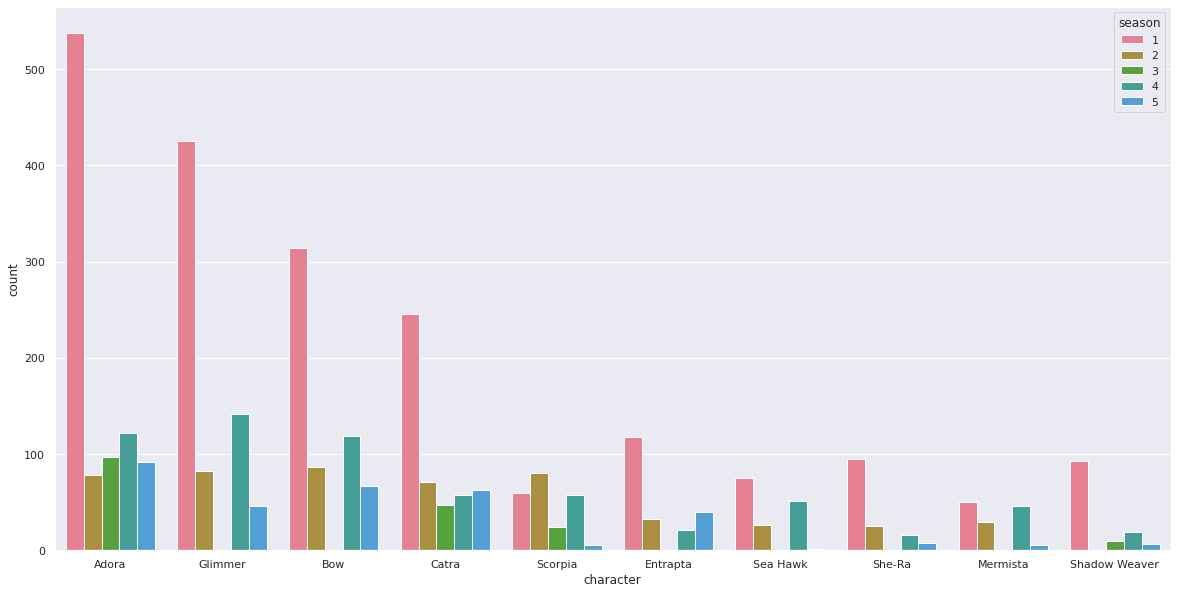

In [14]:
sns.set(style="darkgrid", palette = 'husl')

plt.figure(figsize=(20,10))

ax = sns.countplot(x="character", data=df, hue='season', order=df.character.value_counts().iloc[:10].index)

In [15]:
# add line graph across seasons with each line being a character, top 10 characters?

**add conclusion here once more seasons are added**

# What are the most common words used by characters in this show?

First, lets look at a wordcloud of the most common words on this show: 

In [16]:
# set up wordcloud
stopwords = set(STOPWORDS)

#x, y = np.ogrid[:300, :300]
#mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2 #change mask to heart
#mask = 255 * mask.astype(int)

mask = np.array(Image.open(path.join( "heart_mask.jpg")))

wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, mask = mask)

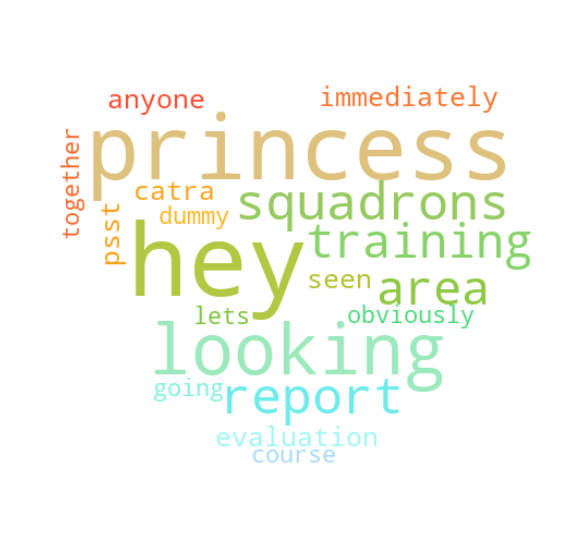

In [17]:
# show wordcloud of most common words in all dialogue
all_text = str(df.dialogue.values)
all_text = all_text.lower()

image_colors = ImageColorGenerator(mask)

wordcloud = wc.generate(all_text)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

Now, let's look at the most common word spoken by the 20 most prominent characters. 

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_nltk = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
punctuations = string.punctuation + ''

In [20]:
# word counter function

def ct(text):
  new_text=[]
  for words in text:
    words = words.split()
    for word in words:
      word = str(word)
      word = word.lower()
      if word not in stopwords_nltk:
        new_word=''
        for char in word:
          if char not in punctuations:
            new_word = new_word + char
        new_text.append(new_word)
        if '' in new_text: 
          new_text.remove('')
    
  total = len(new_text)
  c = Counter(new_text)
  word = c.most_common(1)[0][0]
  word_count = c.most_common(1)[0][1]
  return word, word_count, total, c, new_text

In [21]:
top_20_characters = list(df.character.value_counts().iloc[:20].index)

most_common_word = []
word_count = []
word_proportion = []

for ch in top_20_characters: 
  s = df[df.character == ch]
  text = list(s.dialogue.values)
  word, count, total, c, text = ct(text)
  most_common_word.append(word)
  word_count.append(count)
  proportion = str(float(count) / float(total) * 100) + '%'
  word_proportion.append(proportion)


Below is a table of the most common word spoken by the 20 characters with the most lines: 

In [22]:
most_common_word_df = pd.DataFrame(data = {'character':top_20_characters, 'most common word':most_common_word, 'number of instances': word_count, 'proportion of dialogue': word_proportion})
print("Most Common Word Spoken By the 20 Most Prominent Characters")
most_common_word_df

Most Common Word Spoken By the 20 Most Prominent Characters


,character,most common word,number of instances,proportion of dialogue
0,Adora,im,90,1.6863406408094435%
1,Glimmer,us,57,1.3070396698005045%
2,Bow,glimmer,73,2.154663518299882%
3,Catra,adora,68,2.1376925495127317%
4,Scorpia,catra,40,2.0294266869609334%
5,Entrapta,it,31,1.7386427369601793%
6,Sea Hawk,im,18,1.6201620162016201%
7,She-Ra,no,19,2.490170380078637%
8,Mermista,im,12,1.6%
9,Shadow Weaver,adora,33,3.606557377049181%


Most character tend to refer to another character or themselves - showing who is their main focus and priority throughout the show. Some of these characters require the context of the show. For example, Entrapta's most commmon word is "it," which seems uninformative. However, she has a strong affinity to robots and reguarly talks about them, so there is no doubt that her robits are the subject of most of her lines. 

Interestingly, Adora's most used word is "know" and when she is She-Ra, "no." To me, this might be indicative of her goal to seek knowledge - about her own past, about how to save Etheria - but also how she convinces others to have hope, as that is her main role. When she is She-Ra, her role is so defeat villians, and the word "no" perfectly summarizes just that. 

# What are the most "important" words spoken by characters on this show? 

For this, I will be utilizing TF-IDF, as this will filter out the words that are used so often they don't add much meaning to the text analysis. This method will also filter out the words that are used so little they are insignificant. 

In [23]:
text = []
for line in list(df.dialogue.values): 
  line = str(line)
  line = line.split()
  new_line = ''
  for word in line: 
    word = str(word)
    word = word.lower()
    if word not in stopwords_nltk:
      new_word=''
      for char in word:
        if char not in punctuations:
          new_word = new_word + char
      new_line = new_line + " " + new_word
  text.append(new_line)

In [24]:
print(text[0:10])

['  hey princess looking me', ' squadrons report training area immediately evaluation', ' psst anyone seen catra', ' again', ' attention cadets simulation begin heres scenario passing treacherous whispering woods reach heart rebel insurgency bright moon', ' mission defeat queen princesses liberate bright moon lord hordaks name wheres catra', ' here promise', ' mmhmm whispering woods full princesses vicious violent instigatorsthey take given chance give them good luck recruits', ' watch out', ' oh no no no no no']


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# to-do: parameter tune later

cv = CountVectorizer(strip_accents='ascii',
                     lowercase=True,
                     tokenizer=None,
                     stop_words='english', #enlgish stop words dictionary
                     ngram_range=(1, 1), #broken down into one word units, you can change to 1+2 word units, etc
                     max_df=1.0,
                     min_df=0,
                     max_features=None,
                     vocabulary=None)

In [26]:
cv_text = cv.fit_transform(text)

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=False).fit(cv_text)

tfidf_df = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["weights"])
print("top 25 most important words")
tfidf_df.sort_values(by=['weights']).head(25)

top 25 most important words


,weights
im,3.612511
know,3.724580
adora,3.815094
glimmer,4.029503
like,4.060411
okay,4.106291
horde,4.174278
oh,4.189468
right,4.274626
catra,4.291433


## Part of Speech Tagging

Coming Soon.

# Data Modeling: Data Modeling: Can we predict which lines were spoken by Adora? or Catra? 

Since the show revolves around these two characters' relationship, I decided to make a model to predict each characters' lines. Let's see how well it works!

In [28]:
# more import statements
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Predicting Adora's lines

In [29]:
from sklearn.model_selection import train_test_split

df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df['dialogue'],
                                                    df['character'], test_size=0.33, random_state=42)

In [30]:
cv_train = cv.fit_transform(X_train)
tfidf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=False).fit(cv_train)
X_train_processed = tfidf.transform(cv_train)

In [31]:
cv_test = cv.transform(X_test)
X_test_processed = tfidf.transform(cv_test)

In [32]:
# split classes into Adora = 1, Everyone else = 0
new_y_train = y_train.copy()
y_train = []
for line in list(new_y_train.values): 
  if line == 'Adora': 
    y_train.append(1)
  else: 
    y_train.append(0)

new_y_test = y_test.copy()
y_test = []
for line in list(new_y_test.values): 
  if line == 'Adora': 
    y_test.append(1)
  else: 
    y_test.append(0)
print(y_train[0:10])
print(y_test[0:10])

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


### Naive Bayes

In [33]:
nb = MultinomialNB()

param_grid = { 
    'alpha': [0, .5, 1],
    'fit_prior':[True, False], 
}

CV_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv= 5)
CV_nb.fit(X_train_processed, y_train)
print(CV_nb.best_params_)
print(CV_nb.best_score_)

{'alpha': 1, 'fit_prior': True}
0.8150943396226416


In [34]:
nb = MultinomialNB(alpha=1)

nb.fit(X_train_processed, y_train)
y_pred = nb.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 80.22%

F1 Score: 8.82

Precision: 83.33%

Recall: 4.66%

Confusion Matrix:
 [[1242    3]
 [ 307   15]]


### Logistic Regression

In [35]:
lg = LogisticRegression() 

param_grid = { 
    'C': [1,10,100, 200],
    "penalty":["l1","l2"]
}

CV_lg = GridSearchCV(estimator=lg, param_grid=param_grid, cv= 5)
CV_lg.fit(X_train_processed, y_train)
print(CV_lg.best_params_)
print(CV_lg.best_score_)

{'C': 1, 'penalty': 'l2'}
0.8188679245283019


In [36]:
lg = LogisticRegression(C=1, penalty='l2')

lg.fit(X_train_processed, y_train)
y_pred = lg.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 80.66%

F1 Score: 13.18

Precision: 85.19%

Recall: 7.14%

Confusion Matrix:
 [[1241    4]
 [ 299   23]]


### SVM

In [37]:
lsvc = LinearSVC()

param_grid = {
    'penalty': ['l2'],
    'C': [.01,.1, 1],
    'loss' : ["squared_hinge", "hinge"]
}

CV_lsvc = GridSearchCV(estimator=lsvc, param_grid=param_grid, cv = 5)
CV_lsvc.fit(X_train_processed, y_train)

print(CV_lsvc.best_params_)
print(CV_lsvc.best_score_)

{'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.818553459119497


In [38]:
lsvc = LinearSVC(C=1,loss='hinge', penalty='l2')

lsvc.fit(X_train_processed, y_train)
y_pred = lsvc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 80.66%

F1 Score: 15.60

Precision: 75.68%

Recall: 8.70%

Confusion Matrix:
 [[1236    9]
 [ 294   28]]


### Random Forest

In [39]:
#Random Forest Grid Search
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [15, 20, 30],
    'max_depth':[15, 20, 30]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_processed, y_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'max_depth': 30, 'n_estimators': 20}
0.8150943396226417


In [40]:
rfc = RandomForestClassifier(max_depth=30, n_estimators=20) 

rfc.fit(X_train_processed, y_train)
y_pred = rfc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 79.96%

F1 Score: 5.99

Precision: 83.33%

Recall: 3.11%

Confusion Matrix:
 [[1243    2]
 [ 312   10]]


### Gradient Boosting

In [41]:
gbc = GradientBoostingClassifier() 

param_grid = { 
    'n_estimators': [15, 20, 30],
    'max_depth':[15, 20, 30]
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5)
CV_gbc.fit(X_train_processed, y_train)
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'max_depth': 15, 'n_estimators': 30}
0.808490566037736


In [42]:
gbc = GradientBoostingClassifier(max_depth=20, n_estimators=30) 

gbc.fit(X_train_processed, y_train)
y_pred = gbc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 78.94%

F1 Score: 16.67

Precision: 44.59%

Recall: 10.25%

Confusion Matrix:
 [[1204   41]
 [ 289   33]]


## Predicting Catra's lines

In [43]:
from sklearn.model_selection import train_test_split

df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df['dialogue'],
                                                    df['character'], test_size=0.33, random_state=42)

In [44]:
cv_train = cv.fit_transform(X_train)
tfidf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=False).fit(cv_train)
X_train_processed = tfidf.transform(cv_train)

In [45]:
cv_test = cv.transform(X_test)
X_test_processed = tfidf.transform(cv_test)

In [46]:
# split classes into Catra = 1, Everyone else = 0
new_y_train = y_train.copy()
y_train = []
for line in list(new_y_train.values): 
  if line == 'Catra': 
    y_train.append(1)
  else: 
    y_train.append(0)

new_y_test = y_test.copy()
y_test = []
for line in list(new_y_test.values): 
  if line == 'Catra': 
    y_test.append(1)
  else: 
    y_test.append(0)
print(y_train[0:10])
print(y_test[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Naive Bayes

In [47]:
nb = MultinomialNB()

param_grid = { 
    'alpha': [0, .5, 1],
    'fit_prior':[True, False], 
}

CV_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv= 5)
CV_nb.fit(X_train_processed, y_train)
print(CV_nb.best_params_)
print(CV_nb.best_score_)

{'alpha': 1, 'fit_prior': True}
0.8977987421383646


In [48]:
nb = MultinomialNB(alpha=1)

nb.fit(X_train_processed, y_train)
y_pred = nb.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 89.85%

F1 Score: 0.00

Precision: 0.00%

Recall: 0.00%

Confusion Matrix:
 [[1408    0]
 [ 159    0]]


### Logistic Regression

In [49]:
lg = LogisticRegression() 

param_grid = { 
    'C': [1,10,100, 200],
    "penalty":["l1","l2"]
}

CV_lg = GridSearchCV(estimator=lg, param_grid=param_grid, cv= 5)
CV_lg.fit(X_train_processed, y_train)
print(CV_lg.best_params_)
print(CV_lg.best_score_)

{'C': 1, 'penalty': 'l2'}
0.8977987421383646


In [50]:
lg = LogisticRegression(C=1, penalty='l2')

lg.fit(X_train_processed, y_train)
y_pred = lg.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 89.85%

F1 Score: 0.00

Precision: 0.00%

Recall: 0.00%

Confusion Matrix:
 [[1408    0]
 [ 159    0]]


### SVM

In [51]:
lsvc = LinearSVC()

param_grid = {
    'penalty': ['l2'],
    'C': [.01,.1, 1],
    'loss' : ["squared_hinge", "hinge"]
}

CV_lsvc = GridSearchCV(estimator=lsvc, param_grid=param_grid, cv = 5)
CV_lsvc.fit(X_train_processed, y_train)

print(CV_lsvc.best_params_)
print(CV_lsvc.best_score_)

{'C': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.8977987421383646


In [52]:
lsvc = LinearSVC(C=0.1,loss='squared_hinge', penalty='l2')

lsvc.fit(X_train_processed, y_train)
y_pred = lsvc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 89.85%

F1 Score: 0.00

Precision: 0.00%

Recall: 0.00%

Confusion Matrix:
 [[1408    0]
 [ 159    0]]


### Random Forest

In [53]:
#Random Forest Grid Search
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [15, 20, 30],
    'max_depth':[15, 20, 30]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_processed, y_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'max_depth': 30, 'n_estimators': 15}
0.8987421383647799


In [54]:
rfc = RandomForestClassifier(max_depth=30, n_estimators=15) 

rfc.fit(X_train_processed, y_train)
y_pred = rfc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 89.79%

F1 Score: 1.23

Precision: 33.33%

Recall: 0.63%

Confusion Matrix:
 [[1406    2]
 [ 158    1]]


### Gradient Boosting

In [55]:
gbc = GradientBoostingClassifier() 

param_grid = { 
    'n_estimators': [15, 20, 30],
    'max_depth':[15, 20, 30]
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5)
CV_gbc.fit(X_train_processed, y_train)
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'max_depth': 15, 'n_estimators': 15}
0.8977987421383649


In [56]:
gbc = GradientBoostingClassifier(max_depth=20, n_estimators=15) 

gbc.fit(X_train_processed, y_train)
y_pred = gbc.predict(X_test_processed)

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100)) #harmonic mean of precision & recall (want a higher F1 score)
print("\nPrecision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("\nRecall: {:.2f}%".format(recall_score(y_test, y_pred) * 100)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 89.73%

F1 Score: 6.94

Precision: 42.86%

Recall: 3.77%

Confusion Matrix:
 [[1400    8]
 [ 153    6]]


# What are some relationships among words on this show? 

 

## Word Network Graph

For this section, I will be creating a word network graph, showcasing the common bigrams, or pairs, of words used together on this show. This is one way that we can show connections between words within the dialogue of the show. 

source: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/

In [57]:
from nltk import bigrams
import networkx as nx

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [58]:
text[0:5]

['  hey princess looking me',
 ' squadrons report training area immediately evaluation',
 ' psst anyone seen catra',
 ' again',
 ' attention cadets simulation begin heres scenario passing treacherous whispering woods reach heart rebel insurgency bright moon']

In [59]:
new_text = []
for line in text: 
  new_line =[]
  line = line.split()
  for word in line: 
    new_line.append(word)
  new_text.append(new_line)
new_text[0:5]

[['hey', 'princess', 'looking', 'me'],
 ['squadrons', 'report', 'training', 'area', 'immediately', 'evaluation'],
 ['psst', 'anyone', 'seen', 'catra'],
 ['again'],
 ['attention',
  'cadets',
  'simulation',
  'begin',
  'heres',
  'scenario',
  'passing',
  'treacherous',
  'whispering',
  'woods',
  'reach',
  'heart',
  'rebel',
  'insurgency',
  'bright',
  'moon']]

In [60]:
# Create list of lists containing bigrams in script in each line(?)

terms_bigram = [list(bigrams(line)) for line in new_text]

In [61]:
# Flatten list of bigrams in script
bigrams = list(itertools.chain(*terms_bigram))

In [62]:
# Create counter of words in bigrams
bigram_counts = collections.Counter(bigrams)

In [63]:
bigram_df = pd.DataFrame(bigram_counts.most_common(60), #adjust the number of bigrams
                             columns=['bigram', 'count'])

In [64]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [65]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

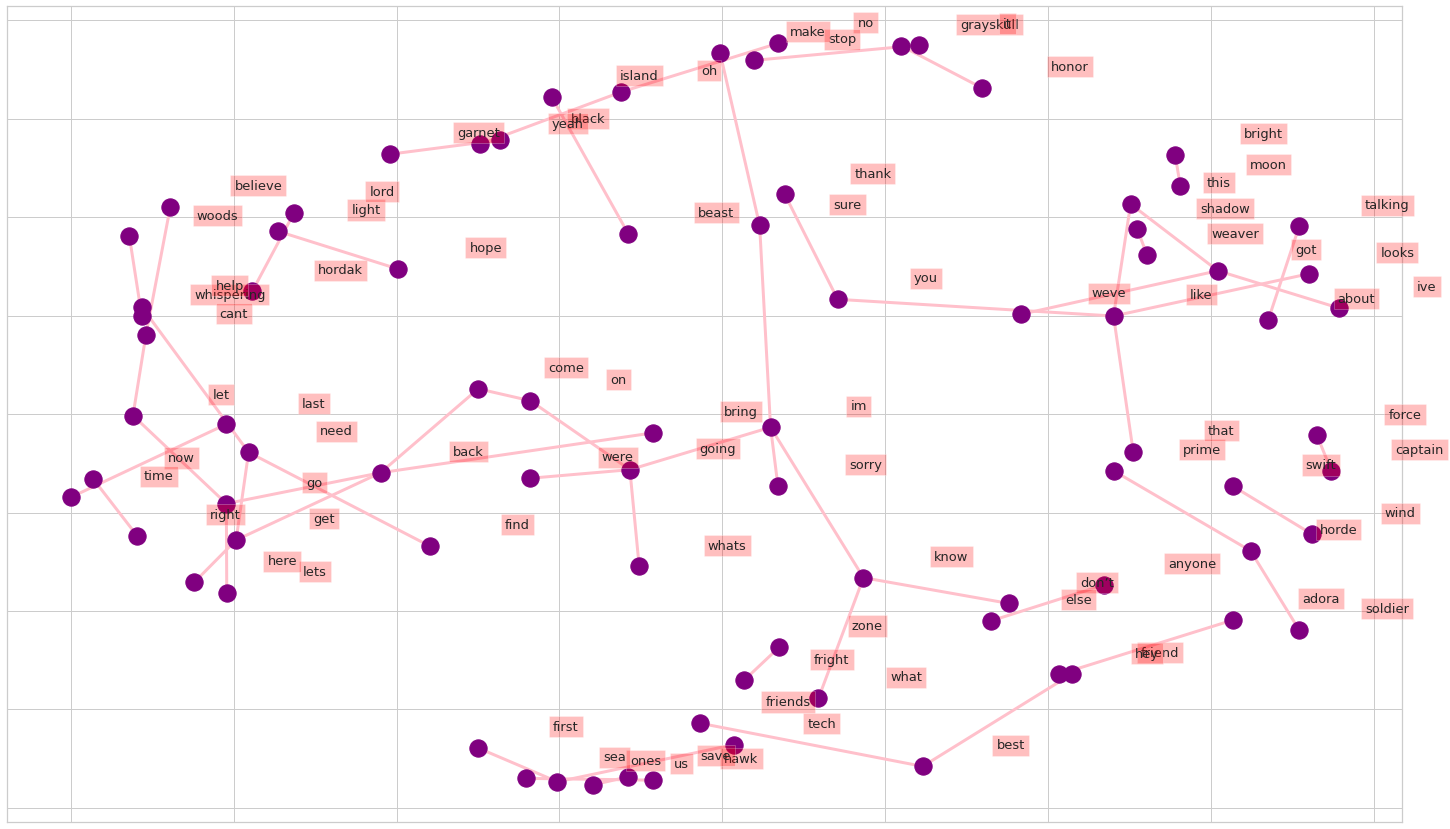

In [66]:
fig, ax = plt.subplots(figsize=(25, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='pink',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
  
plt.show()

## Word2Vec Exploration

Word2Vec produces word embeddings to group vectors of similar words together. Similar words tend to be close to each other in a visualization and have higher similarity scores. In the context of a script, we can see which characters are often talked about in a similar manner and which other words (objects, actions, ajectives, etc.) are commonly associated with specific characters. 

source: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial#Gensim-Word2Vec%C2%A0Tutorial


### Preprocessing

In [67]:
#convert list of responses to df
text_df = pd.DataFrame(text)
text_df.head()

,0
0,hey princess looking me
1,squadrons report training area immediately ev...
2,psst anyone seen catra
3,again
4,attention cadets simulation begin heres scena...


In [68]:
import re
import spacy

nlp = spacy.load('en', disable=['ner', 'parser'])

In [69]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [70]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in text_df[0])

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

In [71]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(3544, 1)

In [72]:
text = [row.split() for row in df_clean['clean']]

### Gensim Word2Vec

tutorial/source code: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial#Gensim-Word2Vec%C2%A0Tutorial

In [73]:
pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 165kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [74]:
from gensim.models.phrases import Phrases, Phraser

In [75]:
# testing out with all data
phrases = Phrases(text, min_count=30, progress_per=10000)

In [76]:
#bigrams detected
bigram = Phraser(phrases)

bigrams = bigram[text]

In [77]:
from collections import defaultdict
word_freq = defaultdict(int)
for text in bigrams:
    for i in text:
        word_freq[i] += 1
len(word_freq)

3312

In [78]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['s', 'know', 'be', 'adora', 'like', 'go', 'come', 'glimmer', 'horde', 'okay']

In [79]:
import multiprocessing
from gensim.models import Word2Vec

cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=5,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [80]:
w2v_model.build_vocab(bigrams, progress_per=10000)

In [81]:
w2v_model.train(bigrams, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(114448, 640980)

In [82]:
w2v_model.init_sims(replace=True)

#### Exploring "Most Similar" Function

use this to input a word and find the top 10 most similar words in the corpus based on the data given. 

In [83]:
w2v_model.wv.most_similar(positive=["shera"])

[('tech', 0.999935507774353),
 ('mad', 0.9999310970306396),
 ('act', 0.9999303221702576),
 ('break', 0.9999291896820068),
 ('attack', 0.9999288320541382),
 ('hit', 0.9999284744262695),
 ('bright_moon', 0.9999282360076904),
 ('call', 0.999927818775177),
 ('signal', 0.999927818775177),
 ('sound', 0.9999277591705322)]

In [84]:
w2v_model.wv.most_similar(positive=["glimmer"])

[('weapon', 0.999930202960968),
 ('lot', 0.9999299049377441),
 ('prisoner', 0.999929666519165),
 ('clearly', 0.999929666519165),
 ('track', 0.9999291896820068),
 ('year', 0.9999284744262695),
 ('best', 0.9999279975891113),
 ('blow', 0.9999270439147949),
 ('don_t', 0.9999268054962158),
 ('entrapta', 0.9999266862869263)]

In [85]:
w2v_model.wv.most_similar(positive=["catra"])

[('begin', 0.9999312162399292),
 ('stuff', 0.9999310970306396),
 ('sure', 0.9999306201934814),
 ('weapon', 0.9999306201934814),
 ('quick', 0.999930202960968),
 ('signal', 0.9999300241470337),
 ('quest', 0.9999297857284546),
 ('um', 0.9999293088912964),
 ('speak', 0.9999290704727173),
 ('important', 0.99992835521698)]

In [86]:
w2v_model.wv.most_similar(negative=["adora"])

[('prom', -0.9998788833618164),
 ('murder', -0.9998819828033447),
 ('distress', -0.9998879432678223),
 ('planning', -0.9998884201049805),
 ('light', -0.999889075756073),
 ('entire', -0.9998915195465088),
 ('isn', -0.9998922348022461),
 ('yay', -0.99989253282547),
 ('princesse', -0.9998930096626282),
 ('black', -0.9998931288719177)]

In [87]:
w2v_model.wv.most_similar(negative=["glimmer"])

[('prom', -0.999873697757721),
 ('distress', -0.9998807907104492),
 ('grayskull', -0.9998888969421387),
 ('cheer', -0.9998899698257446),
 ('aw', -0.9998908042907715),
 ('panic', -0.9998910427093506),
 ('ok', -0.9998917579650879),
 ('sonic', -0.9998923540115356),
 ('write', -0.9998927116394043),
 ('gotcha', -0.9998931884765625)]

#### Exploring "Similarity" Function

use this to find the cosine similarity between two words you input. 


In [88]:
# similarities
w2v_model.wv.similarity("adora", 'shera')

0.99992037

In [89]:
w2v_model.wv.similarity("adora", 'catra')

0.9999097

In [90]:
w2v_model.wv.similarity("shadow_weaver", 'horde')

0.9999212

### Visualization Using t-SNE

"we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**)"

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [92]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(20,20)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

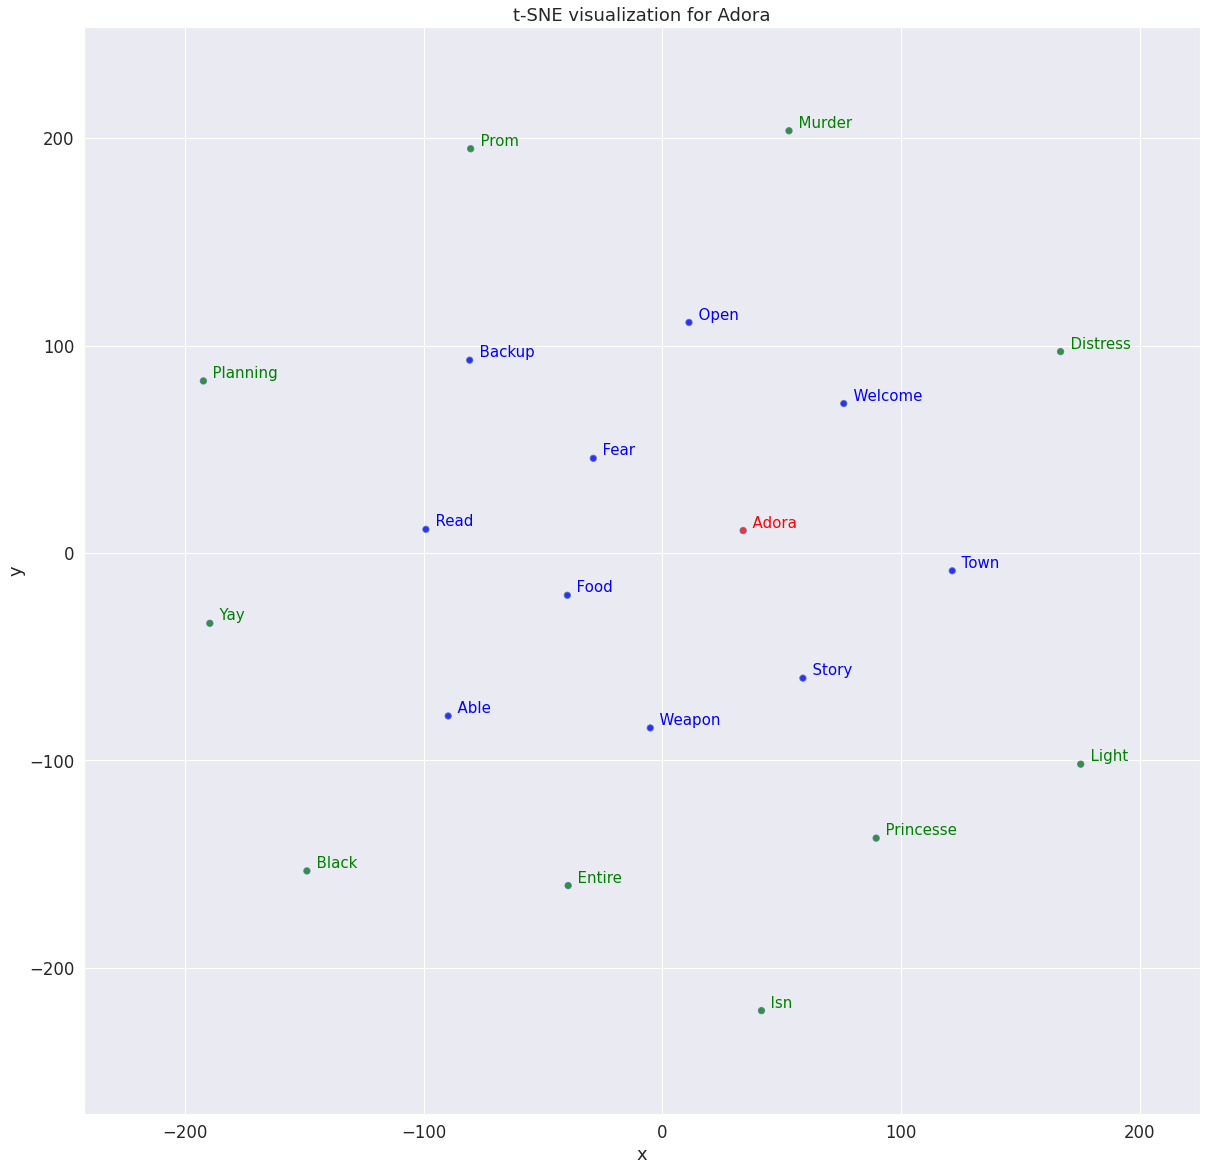

In [93]:
tsnescatterplot(w2v_model, 'adora', [i[0] for i in w2v_model.wv.most_similar(negative=["adora"])])

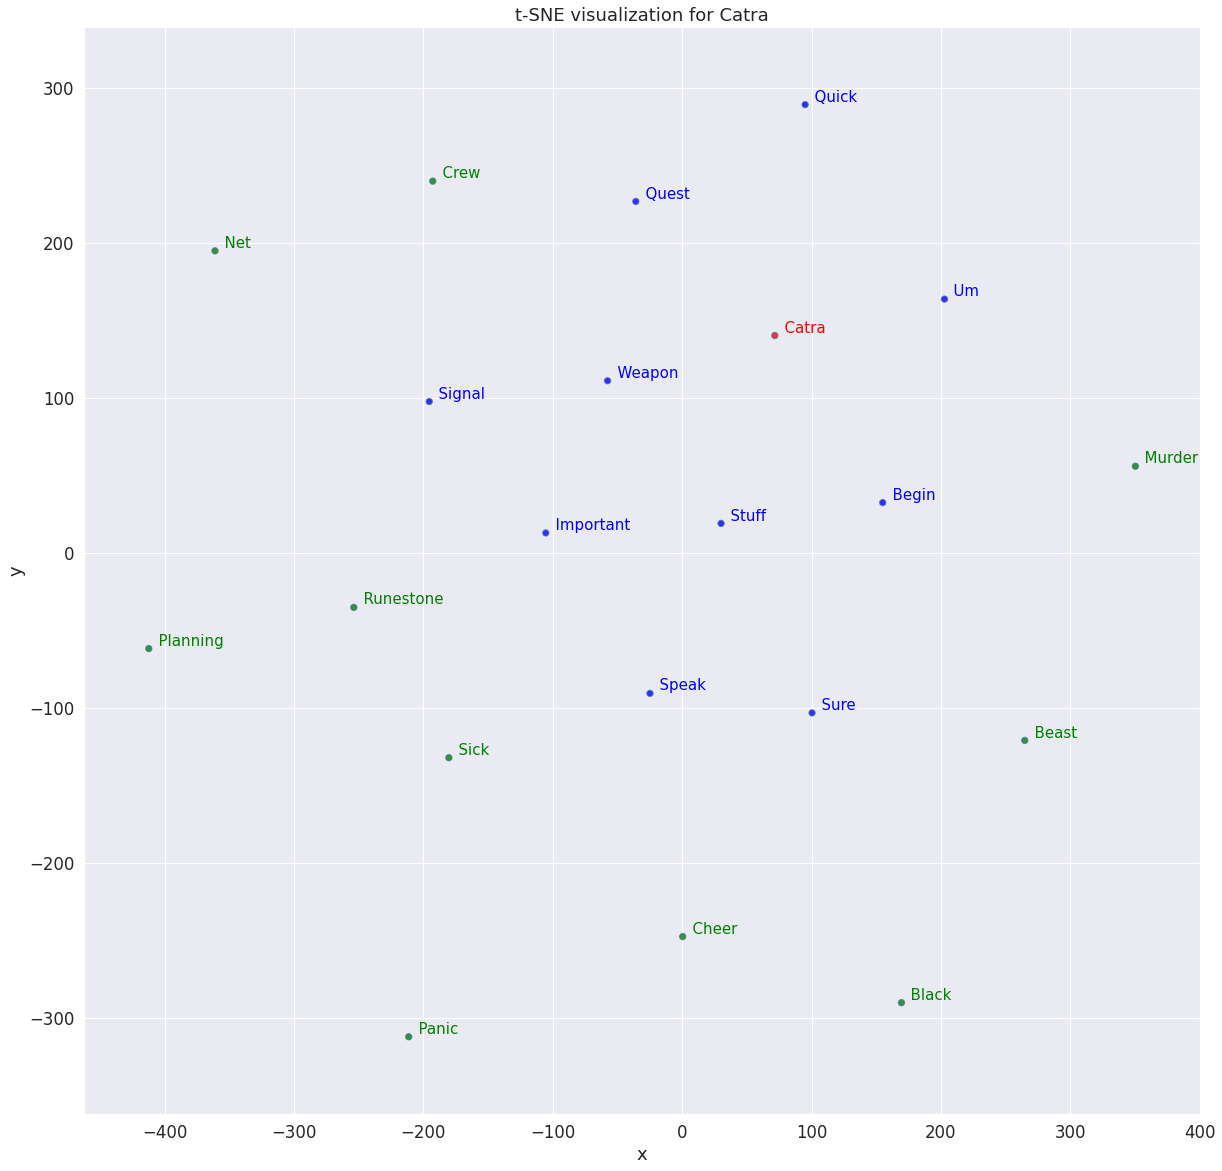

In [94]:
tsnescatterplot(w2v_model, 'catra', [i[0] for i in w2v_model.wv.most_similar(negative=["catra"])])

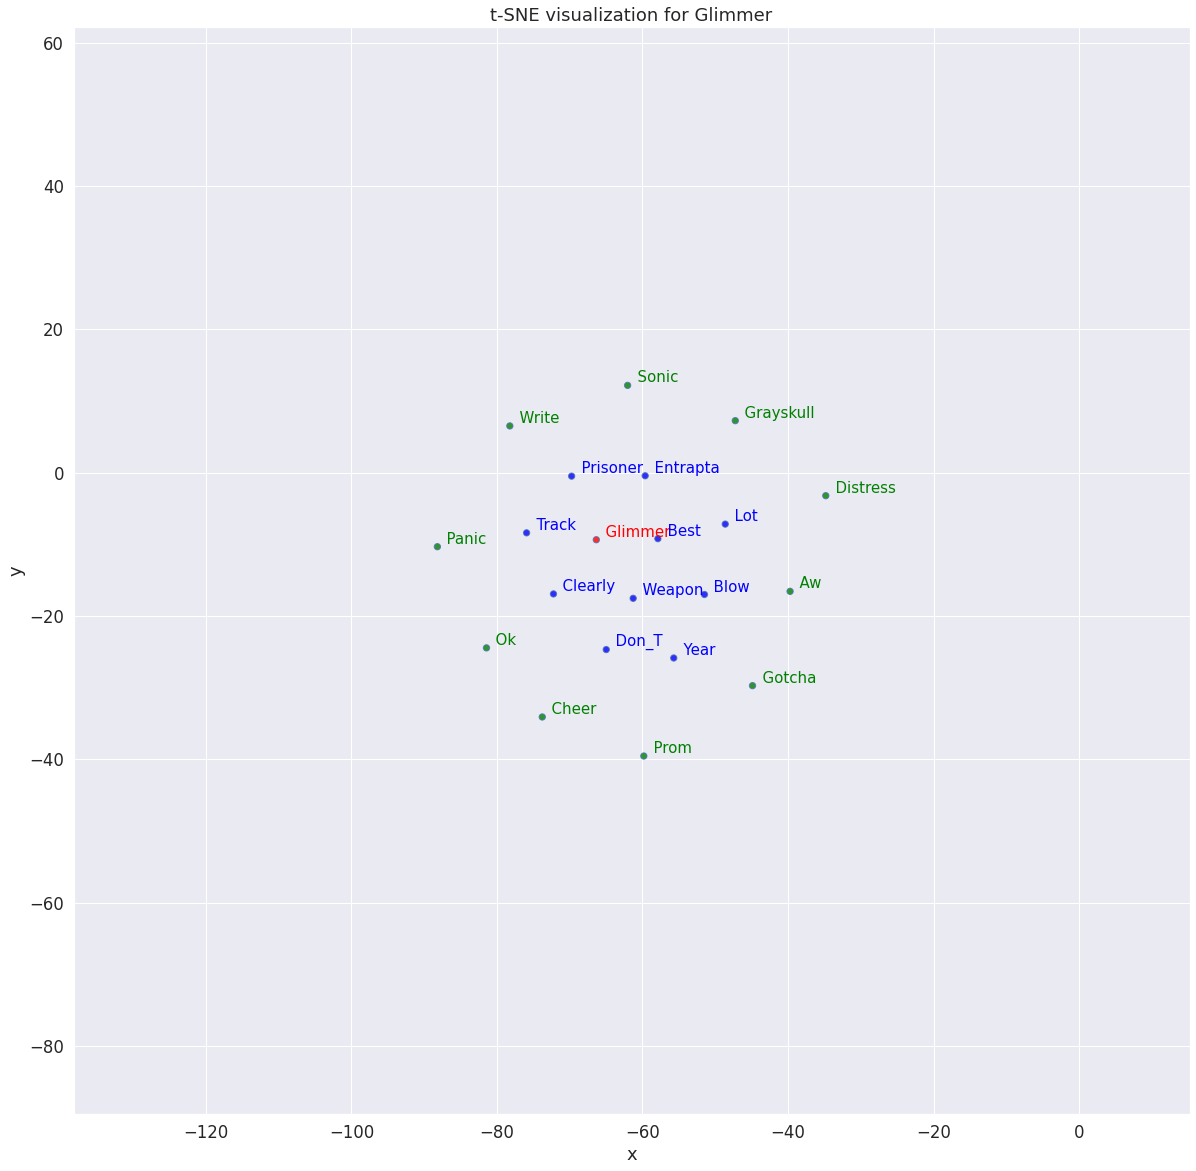

In [95]:
tsnescatterplot(w2v_model, 'glimmer', [i[0] for i in w2v_model.wv.most_similar(negative=["glimmer"])])

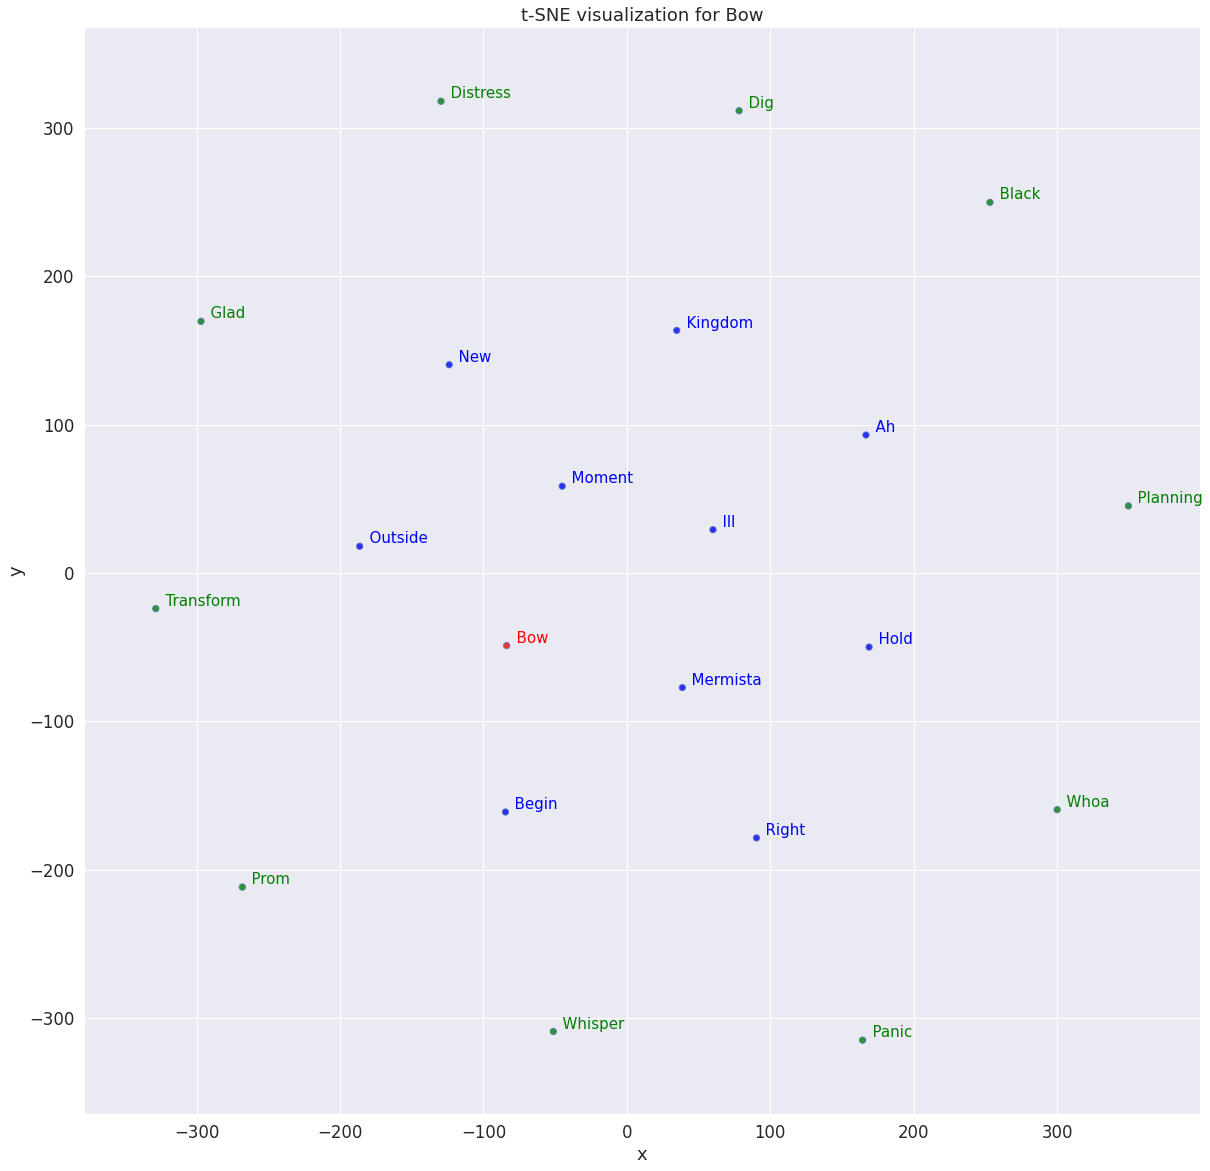

In [96]:
tsnescatterplot(w2v_model, 'bow', [i[0] for i in w2v_model.wv.most_similar(negative=["bow"])])

# Sentiment Analysis by Characters

Coming Soon.